In [1]:
import newdetrender as ndt
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# This Notebook is to clean & stitch ALL sectors from observations of ONE star
This notebook should be in the same location as the **'newdetrender.py'** file  
& the **"LightCurves"** folder that we airdropped to everyone

- _You should only have to amend the cells with stuff above the double hashtag rows_  #################################################################################  #################################################################################  

In [2]:
# name variable of target id number aka tic number aka which star we are working on
star = [25155612]

#################################################################################
#################################################################################

In [3]:
# run new detrender

#################################################################################
#################################################################################
lightcurves, stats = ndt.detrend_data(star)

starting dl for target: 25155612
found 12 files
working on: LightCurves/tess2018206045859-s0001-0000000025155612-0120-s_lc.fits
working on: LightCurves/tess2018234235059-s0002-0000000025155612-0121-s_lc.fits
working on: LightCurves/tess2018263035959-s0003-0000000025155612-0123-s_lc.fits
working on: LightCurves/tess2018292075959-s0004-0000000025155612-0124-s_lc.fits
working on: LightCurves/tess2018319095959-s0005-0000000025155612-0125-s_lc.fits
working on: LightCurves/tess2018349182459-s0006-0000000025155612-0126-s_lc.fits
working on: LightCurves/tess2019006130736-s0007-0000000025155612-0131-s_lc.fits
working on: LightCurves/tess2019058134432-s0009-0000000025155612-0139-s_lc.fits
working on: LightCurves/tess2019085135100-s0010-0000000025155612-0140-s_lc.fits
working on: LightCurves/tess2019112060037-s0011-0000000025155612-0143-s_lc.fits
working on: LightCurves/tess2019140104343-s0012-0000000025155612-0144-s_lc.fits
working on: LightCurves/tess2019169103026-s0013-0000000025155612-0146-s_

In [4]:
#organizing data into easy to read table


#################################################################################
#################################################################################
lc_index = np.arange(0,len(lightcurves),1)
mytable = Table([lc_index, stats[0],stats[1]], names =('lc_index','star_id','sector'))
mytable

lc_index,star_id,sector
int64,int32,int32
0,25155612,1
1,25155612,2
2,25155612,3
3,25155612,4
4,25155612,5
5,25155612,6
6,25155612,7
7,25155612,9
8,25155612,10


In [5]:
#use a dictionary to organize variables based on table above

sectors = {'1': lightcurves[0], '2': lightcurves[1], '3': lightcurves[2], \
           '4': lightcurves[3],'5': lightcurves[4],'6':lightcurves[5],'7':lightcurves[6], \
           '9':lightcurves[7],'10':lightcurves[8], '11':lightcurves[9],'12':lightcurves[10], \
           '13':lightcurves[11],#'13':lightcurves[12]###
          }

#sector values are 'strings' above 
#lightcurves indices (lc_index) are inside []
#################################################################################
#################################################################################

print('it is VERY VERY VERY VERY important that this dictionary is accurate \n' \
        '- triple check this matches table above!!')

it is VERY VERY VERY VERY important that this dictionary is accurate 
- triple check this matches table above!!


In [6]:
#creating a function to help debug if variables get confused

#################################################################################
#################################################################################

def sector_check(sector_i_think):
    if sector_i_think == sector:
        return print('yup! sector is:',sector)
    else:
        return print('nah, sector is really:',sector)

# Clean - Sector  1


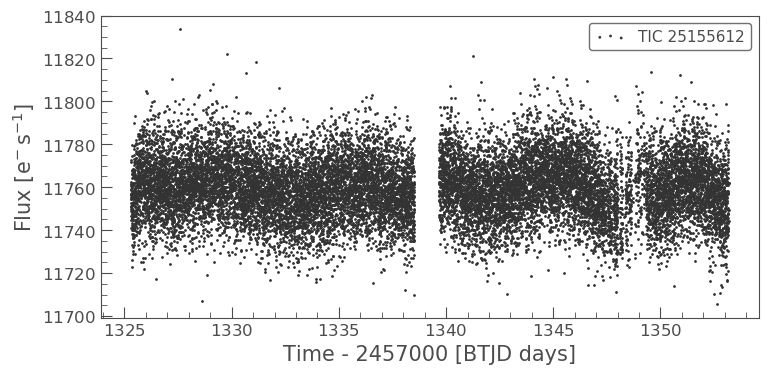

In [7]:
# STEP ONE
#name sector you are working on
sector = '1' 

#name these values
# beginmask = 1330.5
# endmask = 1330.8

# beginmask2 = 1337
# endmask2 = 1337.3

# beginmask3 = 1350.4
# endmask3 = 1351.1

# beginmask4 = 1352.6
# endmask4 = 1352.9

################################################################################
################################################################################

#finding bad bits to mask
sectors[sector].scatter()
# plt.ylim(43500, 46000)
# plt.axvline(beginmask,color = 'r',linestyle = '--')
# plt.axvline(endmask,color = 'b',linestyle='--')

# plt.axvline(beginmask2,color = 'r',linestyle = '--')
# plt.axvline(endmask2,color = 'b',linestyle='--')

# plt.axvline(beginmask3,color = 'r',linestyle = '--')
# plt.axvline(endmask3,color = 'b',linestyle='--')

# plt.axvline(beginmask4,color = 'r',linestyle = '--')
# plt.axvline(endmask4,color = 'b',linestyle='--')


#removing outliers
lc = sectors[sector].remove_outliers()

#creates dictionary of the 3 separate data arrays needed PER sector
data = {'flux': lc.flux,'flux_err': lc.flux_err, 'time':lc.time} 

In [8]:
# STEP TWO
# Masking Cell 
#this cell is only needed if there are regions of bad bits to mask

################################################################################
################################################################################

# #create 1st mask based on time array
# mask = (data['time'] > beginmask) & (data['time'] < endmask) #uses values from above
# #applying 1st mask and save masked arrays in a dictionary
# masked_data = {'time': data['time'][~mask], 'flux': data['flux'][~mask], \
#                'flux_err': data['flux_err'][~mask]}

# #create 2nd mask
# mask2 = (data2['time'] > beginmask2) & (data2['time'] < endmask2)
# #applying 2nd mask and save masked arrays in a dictionary
# data3 = {'time': data2['time'][~mask2], 'flux': data2['flux'][~mask2], \
#                'flux_err': data2['flux_err'][~mask2]}

# #create 3rd mask
# mask3 = (data3['time'] > beginmask3) & (data3['time'] < endmask3)
# #applying 3rd mask and save masked arrays in a dictionary
# data4 = {'time': data3['time'][~mask3], 'flux': data3['flux'][~mask3], \
#                'flux_err': data3['flux_err'][~mask3]}

# #create 4th mask
# mask4 = (data4['time'] > beginmask4) & (data4['time'] < endmask4)
# #applying 3rd mask and save masked arrays in a dictionary
# masked_data = {'time': data4['time'][~mask4], 'flux': data4['flux'][~mask4], \
#                'flux_err': data4['flux_err'][~mask4]}

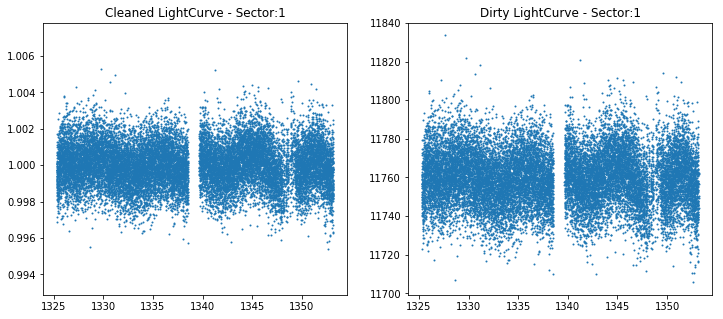

In [9]:
## STEP THREE
#normalizing data & verifying mask works

#################################################################################
#################################################################################

#normalizing
clean_flux = data['flux'] / np.mean(data['flux'])
clean_flux_err = data['flux_err'] / np.mean(data['flux_err'])
#except time, don't normalize that
clean_time = data['time']


#set up figure and axes for multiple plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
#first plot
ax1.scatter(clean_time, clean_flux,s=1)
ax1.set_title('Cleaned LightCurve - Sector:{}'.format(sector))
#second plot
ax2.scatter(sectors[sector].time,sectors[sector].flux,s=1)
ax2.set_title('Dirty LightCurve - Sector:{}'.format(sector));

In [10]:
# STEP FOUR
#saving sector clean data
sector = '1'

#################################################################################
#################################################################################


#naming path
pathname = 'cleaned_data/{}/'.format(star) #uses star id from the top of notebook
os.makedirs(os.path.dirname(pathname), exist_ok=True) #checks if folder exists and makes if it doesnt

#naming & saving clean data arrays
np.save(pathname + 'time_{}'.format(sector),clean_time) 
np.save(pathname + 'flux_{}'.format(sector),clean_flux)
np.save(pathname + 'fluxerr_{}'.format(sector),clean_flux_err)

# Clean - Sector  2 -- No Sector 2

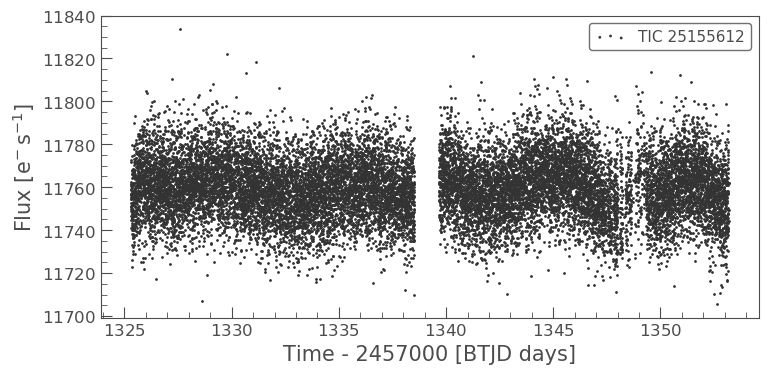

In [11]:
# STEP ONE
#useful when saving cleaned data later
#sector = '2' 

#nothing to mask

#name these values
#beginmask = 1347.8
#endmask = 1349.3


#################################################################################
#################################################################################

#finding bad bits to mask
sectors[sector].scatter()
#plt.axvline(beginmask,color = 'r',linestyle = '--')
#plt.axvline(endmask,color = 'b',linestyle='--')

#removing outliers
lc = sectors[sector].remove_outliers()

#creates dictionary of the 3 separate data arrays needed PER sector
data = {'flux': lc.flux,'flux_err': lc.flux_err, 'time':lc.time} 

In [12]:
# STEP TWO
# Masking Cell SKIP b/c this sector has nothing to mask

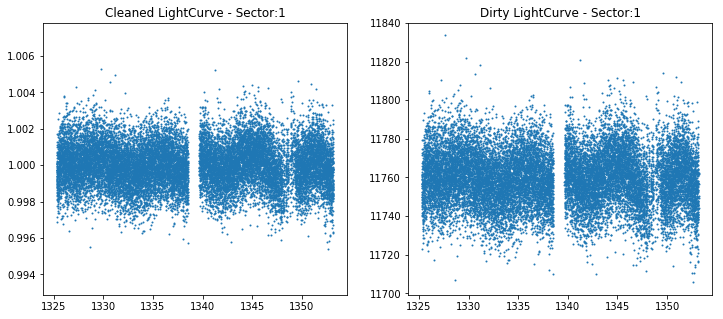

In [13]:
# STEP THREE
#normalizing data & verifying mask works

#################################################################################
#################################################################################

#normalizing
clean_flux = data['flux'] / np.mean(data['flux'])
clean_flux_err = data['flux_err'] / np.mean(data['flux_err'])
#except time, don't normalize that
clean_time = data['time']


#set up figure and axes for multiple plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
#first plot
ax1.scatter(clean_time, clean_flux,s=1)
ax1.set_title('Cleaned LightCurve - Sector:{}'.format(sector))
#second plot
ax2.scatter(sectors[sector].time,sectors[sector].flux,s=1)
ax2.set_title('Dirty LightCurve - Sector:{}'.format(sector));

In [14]:
# STEP FOUR
#saving sector clean data
sector = '2'

#################################################################################
#################################################################################


#naming path
pathname = 'cleaned_data/{}/'.format(star) #uses star id from the top of notebook
os.makedirs(os.path.dirname(pathname), exist_ok=True) #checks if folder exists and makes if it doesnt

#naming & saving clean data arrays
np.save(pathname + 'time_{}'.format(sector),clean_time) 
np.save(pathname + 'flux_{}'.format(sector),clean_flux)
np.save(pathname + 'fluxerr_{}'.format(sector),clean_flux_err)

# Clean - Sector 3- No sector 3

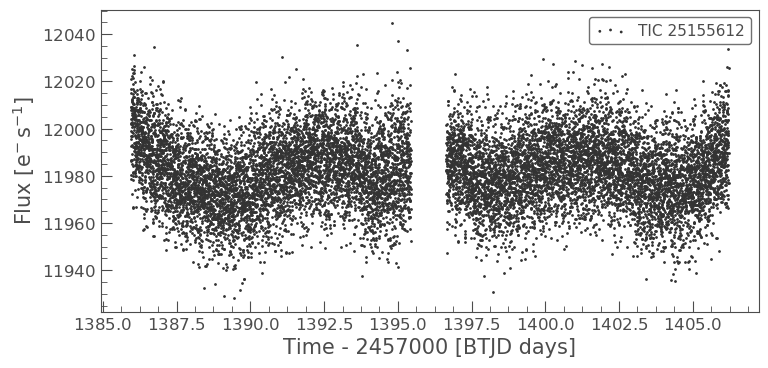

In [15]:
# STEP ONE
#useful when saving cleaned data later
sector = '3' 

#nothing to mask

#name these values
#beginmask = 1394.8
#endmask = 1395.5

################################################################################
################################################################################

#finding bad bits to mask
sectors[sector].scatter()
#plt.axvline(beginmask,color = 'r',linestyle = '--')
#plt.axvline(endmask,color = 'b',linestyle='--')

#removing outliers
lc = sectors[sector].remove_outliers()

#creates dictionary of the 3 separate data arrays needed PER sector
data = {'flux': lc.flux,'flux_err': lc.flux_err, 'time':lc.time} 

In [16]:
# STEP TWO
# Masking Cell  
#this cell is only needed if there are regions of bad bits to mask

################################################################################
################################################################################

# #create mask based on time array
# mask = (data['time'] > beginmask) & (data['time'] < endmask) #uses values from above

# #applying mask.....saved masked arrays in a dictionary
# masked_data = {'time': data['time'][~mask], 'flux': data['flux'][~mask], \
#                'flux_err': data['flux_err'][~mask]}

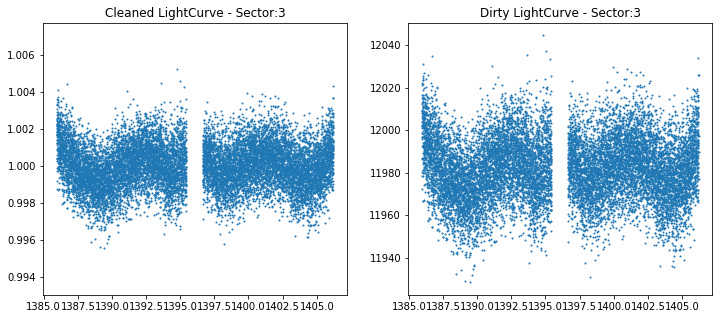

In [17]:
# STEP THREE
#normalizing data & verifying mask works

#################################################################################
#################################################################################

#normalizing
clean_flux = data['flux'] / np.mean(data['flux'])
clean_flux_err = data['flux_err'] / np.mean(data['flux_err'])
#except time, don't normalize that
clean_time = data['time']


#set up figure and axes for multiple plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
#first plot
ax1.scatter(clean_time, clean_flux,s=1)
ax1.set_title('Cleaned LightCurve - Sector:{}'.format(sector))
#second plot
ax2.scatter(sectors[sector].time,sectors[sector].flux,s=1)
ax2.set_title('Dirty LightCurve - Sector:{}'.format(sector));

In [18]:
# STEP FOUR
#saving sector clean data
sector = '3'

#################################################################################
#################################################################################


#naming path
pathname = 'cleaned_data/{}/'.format(star) #uses star id from the top of notebook
os.makedirs(os.path.dirname(pathname), exist_ok=True) #checks if folder exists and makes if it doesnt

#naming & saving clean data arrays
np.save(pathname + 'time_{}'.format(sector),clean_time) 
np.save(pathname + 'flux_{}'.format(sector),clean_flux)
np.save(pathname + 'fluxerr_{}'.format(sector),clean_flux_err)

# Clean - Sector 4 

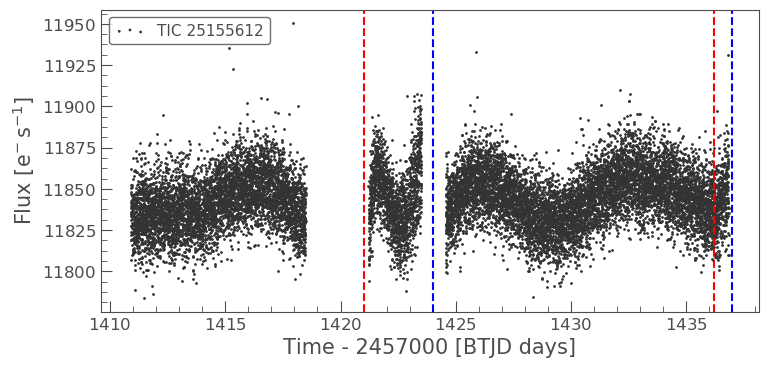

In [19]:
# STEP ONE
#useful when saving cleaned data later
sector = '4' 


#name these values
beginmask = 1421
endmask = 1424

beginmask2 = 1436.2
endmask2 = 1437

# beginmask3 = 1431.5
# endmask3 = 1431.8

# beginmask4 = 1412.6
# endmask4 = 1412.9


################################################################################
################################################################################

#finding bad bits to mask
sectors[sector].scatter()
# plt.ylim(42500, 44000)
#1st bad region
plt.axvline(beginmask,color = 'r',linestyle = '--')
plt.axvline(endmask,color = 'b',linestyle='--')
#second bad region
plt.axvline(beginmask2,color = 'r',linestyle = '--')
plt.axvline(endmask2,color = 'b',linestyle='--')
# #third bad region
# plt.axvline(beginmask3,color = 'r',linestyle = '--')
# plt.axvline(endmask3,color = 'b',linestyle='--')
# #fourth bad region
# plt.axvline(beginmask4,color = 'r',linestyle = '--')
# plt.axvline(endmask4,color = 'b',linestyle='--')


#removing outliers
lc = sectors[sector].remove_outliers()

#creates dictionary of the 3 separate data arrays needed PER sector
data = {'flux': lc.flux,'flux_err': lc.flux_err, 'time':lc.time} 

In [20]:
# STEP TWO
# Masking Cell 
#this cell is only needed if there are regions of bad bits to mask

################################################################################
################################################################################

#create 1st mask based on time array
mask = (data['time'] > beginmask) & (data['time'] < endmask) #uses values from above
#applying 1st mask and save masked arrays in a dictionary
data2 = {'time': data['time'][~mask], 'flux': data['flux'][~mask], \
               'flux_err': data['flux_err'][~mask]}

#create 2nd mask
mask2 = (data2['time'] > beginmask2) & (data2['time'] < endmask2)
#applying 2nd mask and save masked arrays in a dictionary
masked_data = {'time': data2['time'][~mask2], 'flux': data2['flux'][~mask2], \
               'flux_err': data2['flux_err'][~mask2]}

# #create 3rd mask
# mask3 = (data3['time'] > beginmask3) & (data3['time'] < endmask3)
# #applying 3rd mask and save masked arrays in a dictionary
# data4 = {'time': data3['time'][~mask3], 'flux': data3['flux'][~mask3], \
#                'flux_err': data3['flux_err'][~mask3]}

# #create 4th mask
# mask4 = (data4['time'] > beginmask4) & (data4['time'] < endmask4)
# #applying 3rd mask and save masked arrays in a dictionary
# masked_data = {'time': data4['time'][~mask4], 'flux': data4['flux'][~mask4], \
#                'flux_err': data4['flux_err'][~mask4]}

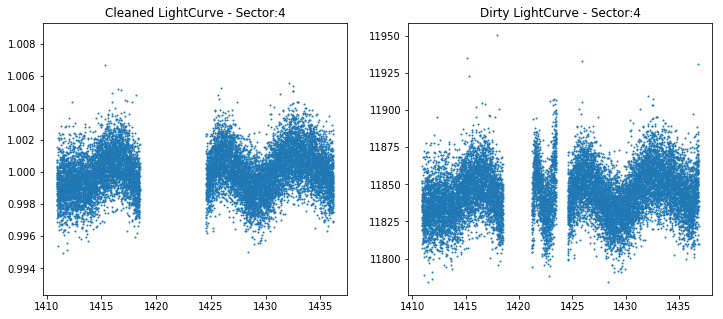

In [21]:
# STEP THREE
#normalizing data & verifying mask works

#################################################################################
#################################################################################

#normalizing
clean_flux = masked_data['flux'] / np.mean(masked_data['flux'])
clean_flux_err = masked_data['flux_err'] / np.mean(masked_data['flux_err'])
#except time, don't normalize that
clean_time = masked_data['time']


#set up figure and axes for multiple plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
#first plot
ax1.scatter(clean_time, clean_flux,s=1)
ax1.set_title('Cleaned LightCurve - Sector:{}'.format(sector))
#second plot
ax2.scatter(sectors[sector].time,sectors[sector].flux,s=1)
ax2.set_title('Dirty LightCurve - Sector:{}'.format(sector));

In [22]:
# STEP FOUR
#saving sector clean data
sector = '4'

#################################################################################
#################################################################################


#naming path
pathname = 'cleaned_data/{}/'.format(star) #uses star id from the top of notebook
os.makedirs(os.path.dirname(pathname), exist_ok=True) #checks if folder exists and makes if it doesnt

#naming & saving clean data arrays
np.save(pathname + 'time_{}'.format(sector),clean_time) 
np.save(pathname + 'flux_{}'.format(sector),clean_flux)
np.save(pathname + 'fluxerr_{}'.format(sector),clean_flux_err)

# Clean - Sector 5 

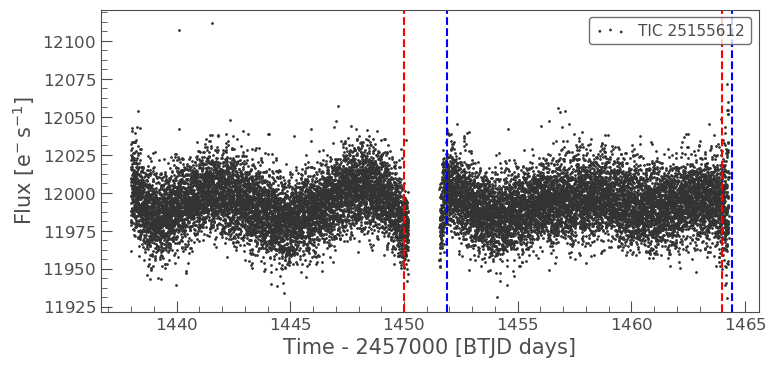

In [23]:
# STEP ONE
#useful when saving cleaned data later
sector = '5' 


#name these values
beginmask1 = 1450
endmask1 = 1451.9

beginmask2 = 1464
endmask2 = 1464.4

# beginmask3 = 1463.7
# endmask3 = 1464.4

################################################################################
################################################################################

#finding bad bits to mask
sectors[sector].scatter()
# #plt.ylim(43000, 43700)
plt.axvline(beginmask1,color = 'r',linestyle = '--')
plt.axvline(endmask1,color = 'b',linestyle='--')

plt.axvline(beginmask2,color = 'r',linestyle = '--')
plt.axvline(endmask2,color = 'b',linestyle='--')

# # plt.axvline(beginmask3,color = 'r',linestyle = '--')
# # plt.axvline(endmask3,color = 'b',linestyle='--')

#removing outliers
lc = sectors[sector].remove_outliers()

#creates dictionary of the 3 separate data arrays needed PER sector
data = {'flux': lc.flux,'flux_err': lc.flux_err, 'time':lc.time} 

In [24]:
# STEP TWO
# Masking Cell 
#this cell is only needed if there are regions of bad bits to mask

################################################################################
################################################################################

#create 1st mask based on time array
mask = (data['time'] > beginmask) & (data['time'] < endmask) #uses values from above
#applying 1st mask and save masked arrays in a dictionary
data2 = {'time': data['time'][~mask], 'flux': data['flux'][~mask], \
               'flux_err': data['flux_err'][~mask]}

#create 2nd mask
mask2 = (data2['time'] > beginmask2) & (data2['time'] < endmask2)
#applying 2nd mask and save masked arrays in a dictionary
masked_data = {'time': data2['time'][~mask2], 'flux': data2['flux'][~mask2], \
               'flux_err': data2['flux_err'][~mask2]}

# #create 3rd mask
# mask3 = (data3['time'] > beginmask3) & (data3['time'] < endmask3)
# #applying 3rd mask and save masked arrays in a dictionary
# masked_data = {'time': data3['time'][~mask3], 'flux': data3['flux'][~mask3], \
#                'flux_err': data3['flux_err'][~mask3]}

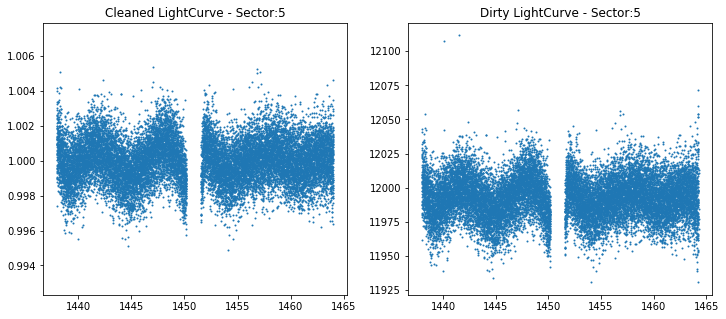

In [25]:
## STEP THREE
#normalizing data & verifying mask works

#################################################################################
#################################################################################

#normalizing
clean_flux = masked_data['flux'] / np.mean(masked_data['flux'])
clean_flux_err = masked_data['flux_err'] / np.mean(masked_data['flux_err'])
#except time, don't normalize that
clean_time = masked_data['time']


#set up figure and axes for multiple plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
#first plot
ax1.scatter(clean_time, clean_flux,s=1)
ax1.set_title('Cleaned LightCurve - Sector:{}'.format(sector))
#second plot
ax2.scatter(sectors[sector].time,sectors[sector].flux,s=1)
ax2.set_title('Dirty LightCurve - Sector:{}'.format(sector));

In [26]:
# STEP FOUR
#saving sector clean data
sector = '5'

#################################################################################
#################################################################################


#naming path
pathname = 'cleaned_data/{}/'.format(star) #uses star id from the top of notebook
os.makedirs(os.path.dirname(pathname), exist_ok=True) #checks if folder exists and makes if it doesnt

#naming & saving clean data arrays
np.save(pathname + 'time_{}'.format(sector),clean_time) 
np.save(pathname + 'flux_{}'.format(sector),clean_flux)
np.save(pathname + 'fluxerr_{}'.format(sector),clean_flux_err)

# Clean - Sector 6

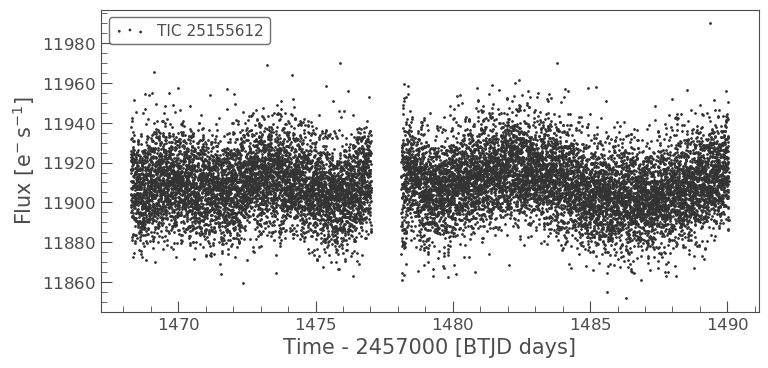

In [27]:
# STEP ONE
#useful when saving cleaned data later
sector = '6' 


#name these values
# beginmask = 1474.6
# endmask = 1474.9

# beginmask2 = 1486.8
# endmask2 = 1487

# beginmask3 = 1487.8
# endmask3 = 1488.1
################################################################################
################################################################################

#finding bad bits to mask
sectors[sector].scatter()
# plt.axvline(beginmask,color = 'r',linestyle = '--')
# plt.axvline(endmask,color = 'b',linestyle='--')

# plt.axvline(beginmask2,color = 'r',linestyle = '--')
# plt.axvline(endmask2,color = 'b',linestyle='--')

# plt.axvline(beginmask3,color = 'r',linestyle = '--')
# plt.axvline(endmask3,color = 'b',linestyle='--')

# #removing outliers
# lc = sectors[sector].remove_outliers()

# #creates dictionary of the 3 separate data arrays needed PER sector
# data = {'flux': lc.flux,'flux_err': lc.flux_err, 'time':lc.time} 

In [28]:
# STEP TWO
# Masking Cell  
#this cell is only needed if there are regions of bad bits to mask

################################################################################
################################################################################

# #create 1st mask based on time array
# mask = (data['time'] > beginmask) & (data['time'] < endmask) #uses values from above
# #applying 1st mask and save masked arrays in a dictionary
# data2 = {'time': data['time'][~mask], 'flux': data['flux'][~mask], \
#                'flux_err': data['flux_err'][~mask]}

# #create 2nd mask
# mask2 = (data2['time'] > beginmask2) & (data2['time'] < endmask2)
# #applying 2nd mask and save masked arrays in a dictionary
# data3 = {'time': data2['time'][~mask2], 'flux': data2['flux'][~mask2], \
#                'flux_err': data2['flux_err'][~mask2]}

# #create 3rd mask
# mask3 = (data3['time'] > beginmask3) & (data3['time'] < endmask3)
# #applying 3rd mask and save masked arrays in a dictionary
# masked_data = {'time': data3['time'][~mask3], 'flux': data3['flux'][~mask3], \
#                'flux_err': data3['flux_err'][~mask3]}

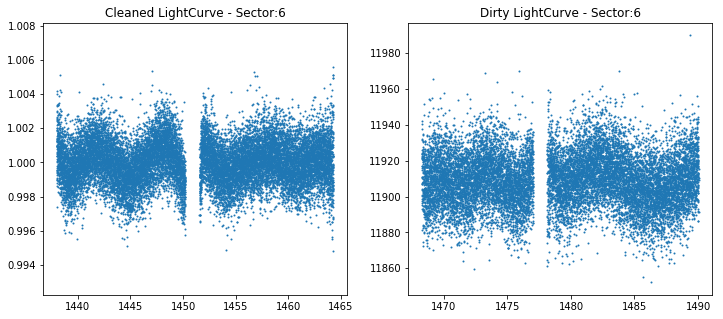

In [29]:
# STEP THREE
#normalizing data & verifying mask works

#################################################################################
#################################################################################

#normalizing
clean_flux = data['flux'] / np.mean(data['flux'])
clean_flux_err = data['flux_err'] / np.mean(data['flux_err'])
#except time, don't normalize that
clean_time = data['time']


#set up figure and axes for multiple plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
#first plot
ax1.scatter(clean_time, clean_flux,s=1)
ax1.set_title('Cleaned LightCurve - Sector:{}'.format(sector))
#second plot
ax2.scatter(sectors[sector].time,sectors[sector].flux,s=1)
ax2.set_title('Dirty LightCurve - Sector:{}'.format(sector));

In [30]:
# STEP FOUR
#saving sector clean data
sector = '6'

#################################################################################
#################################################################################


#naming path
pathname = 'cleaned_data/{}/'.format(star) #uses star id from the top of notebook
os.makedirs(os.path.dirname(pathname), exist_ok=True) #checks if folder exists and makes if it doesnt

#naming & saving clean data arrays
np.save(pathname + 'time_{}'.format(sector),clean_time) 
np.save(pathname + 'flux_{}'.format(sector),clean_flux)
np.save(pathname + 'fluxerr_{}'.format(sector),clean_flux_err)

### Clean - Sector 7 

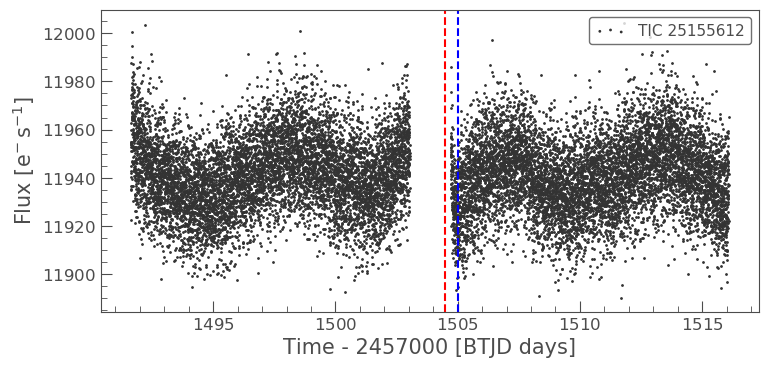

In [31]:
# STEP ONE
#useful when saving cleaned data later
sector = '7' 


#name these values
beginmask = 1504.5
endmask = 1505

################################################################################
################################################################################

#finding bad bits to mask
sectors[sector].scatter()
plt.axvline(beginmask,color = 'r',linestyle = '--')
plt.axvline(endmask,color = 'b',linestyle='--')

#removing outliers
lc = sectors[sector].remove_outliers()

#creates dictionary of the 3 separate data arrays needed PER sector
data = {'flux': lc.flux,'flux_err': lc.flux_err, 'time':lc.time} 

In [32]:
# STEP TWO

#################################################################################
#################################################################################

#create 1st mask based on time array
mask = (data['time'] > beginmask) & (data['time'] < endmask) #uses values from above
#applying 1st mask and save masked arrays in a dictionary
masked_data = {'time': data['time'][~mask], 'flux': data['flux'][~mask], \
               'flux_err': data['flux_err'][~mask]}


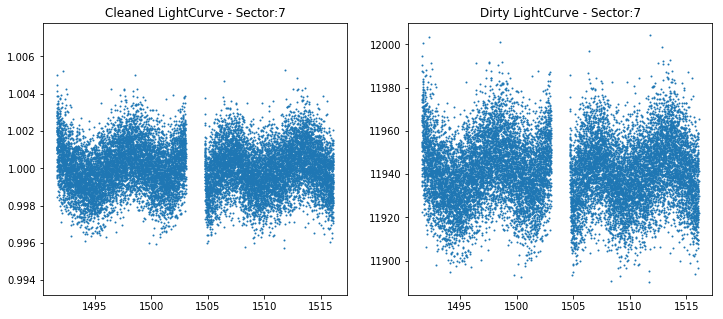

In [33]:
# STEP THREE
#normalizing data & verifying mask works

#################################################################################
#################################################################################

#normalizing
clean_flux = data['flux'] / np.mean(data['flux'])
clean_flux_err = data['flux_err'] / np.mean(data['flux_err'])
#except time, don't normalize that
clean_time = data['time']


#set up figure and axes for multiple plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
#first plot
ax1.scatter(clean_time, clean_flux,s=1)
ax1.set_title('Cleaned LightCurve - Sector:{}'.format(sector))
#second plot
ax2.scatter(sectors[sector].time,sectors[sector].flux,s=1)
ax2.set_title('Dirty LightCurve - Sector:{}'.format(sector));

In [34]:
# STEP FOUR
#saving sector clean data
sector = '7'

#################################################################################
#################################################################################


#naming path
pathname = 'cleaned_data/{}/'.format(star) #uses star id from the top of notebook
os.makedirs(os.path.dirname(pathname), exist_ok=True) #checks if folder exists and makes if it doesnt

#naming & saving clean data arrays
np.save(pathname + 'time_{}'.format(sector),clean_time) 
np.save(pathname + 'flux_{}'.format(sector),clean_flux)
np.save(pathname + 'fluxerr_{}'.format(sector),clean_flux_err)

# Clean - Sector 8- no sector 8


In [35]:
# # STEP ONE
# #useful when saving cleaned data later
# sector = '8' 


# #name these values
# # beginmask1 = 1517.3
# # endmask1 = 1518.8

# # beginmask2 = 1526
# # endmask2 = 1526.2

# # beginmask3 = 1539.1
# # endmask3 = 1539.5

# # beginmask4 = 1539.7
# # endmask4 = 1539.9

# # ################################################################################
# ################################################################################

# #finding bad bits to mask
# sectors[sector].scatter()
# # plt.ylim(43300, 44000)
# # plt.axvline(beginmask1,color = 'r',linestyle = '--')
# # plt.axvline(endmask1,color = 'b',linestyle='--')

# # plt.axvline(beginmask2,color = 'r',linestyle = '--')
# # plt.axvline(endmask2,color = 'b',linestyle='--')

# # plt.axvline(beginmask3,color = 'r',linestyle = '--')
# # plt.axvline(endmask3,color = 'b',linestyle='--')

# # plt.axvline(beginmask4,color = 'r',linestyle = '--')
# # plt.axvline(endmask4,color = 'b',linestyle='--')

# # #removing outliers
# # lc = sectors[sector].remove_outliers()

# # #creates dictionary of the 3 separate data arrays needed PER sector
# # data = {'flux': lc.flux,'flux_err': lc.flux_err, 'time':lc.time} 

In [36]:
# STEP TWO
# Masking Cell 
#this cell is only needed if there are regions of bad bits to mask

################################################################################
################################################################################

#create 1st mask based on time array
# mask = (data['time'] > beginmask) & (data['time'] < endmask) #uses values from above
# #applying 1st mask and save masked arrays in a dictionary
# data2 = {'time': data['time'][~mask], 'flux': data['flux'][~mask], \
#                'flux_err': data['flux_err'][~mask]}

# #create 2nd mask
# mask2 = (data2['time'] > beginmask2) & (data2['time'] < endmask2)
# #applying 2nd mask and save masked arrays in a dictionary
# data3 = {'time': data2['time'][~mask2], 'flux': data2['flux'][~mask2], \
#                'flux_err': data2['flux_err'][~mask2]}

# #create 3rd mask
# mask3 = (data3['time'] > beginmask3) & (data3['time'] < endmask3)
# #applying 3rd mask and save masked arrays in a dictionary
# data4 = {'time': data3['time'][~mask3], 'flux': data3['flux'][~mask3], \
#                'flux_err': data3['flux_err'][~mask3]}

# #create 4th mask
# mask4 = (data4['time'] > beginmask4) & (data4['time'] < endmask4)
# #applying 3rd mask and save masked arrays in a dictionary
# masked_data = {'time': data4['time'][~mask4], 'flux': data4['flux'][~mask4], \
#                'flux_err': data4['flux_err'][~mask4]}

In [37]:
# # STEP THREE
# #normalizing data & verifying mask works

# #################################################################################
# #################################################################################

# #normalizing
# clean_flux = data['flux'] / np.mean(data['flux'])
# clean_flux_err = data['flux_err'] / np.mean(data['flux_err'])
# #except time, don't normalize that
# clean_time = data['time']


# #set up figure and axes for multiple plots
# f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
# #first plot
# ax1.scatter(clean_time, clean_flux,s=1)
# ax1.set_title('Cleaned LightCurve - Sector:{}'.format(sector))
# #second plot
# ax2.scatter(sectors[sector].time,sectors[sector].flux,s=1)
# ax2.set_title('Dirty LightCurve - Sector:{}'.format(sector));

In [38]:
# # STEP FOUR
# #saving sector clean data
# sector = '8'

# #################################################################################
# #################################################################################


# #naming path
# pathname = 'cleaned_data/{}/'.format(star) #uses star id from the top of notebook
# os.makedirs(os.path.dirname(pathname), exist_ok=True) #checks if folder exists and makes if it doesnt

# #naming & saving clean data arrays
# np.save(pathname + 'time_{}'.format(sector),clean_time) 
# np.save(pathname + 'flux_{}'.format(sector),clean_flux)
# np.save(pathname + 'fluxerr_{}'.format(sector),clean_flux_err)

# Clean - Sector 9

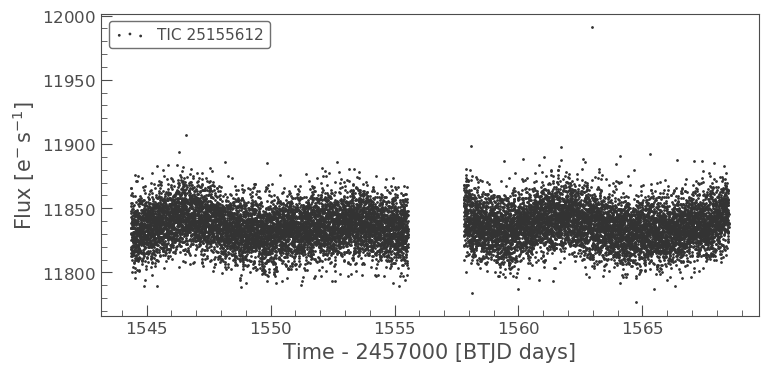

In [39]:
# STEP ONE
#useful when saving cleaned data later
sector = '9' 


#name these values
# beginmask1 = 1547.5
# endmask1 = 1548.4

# beginmask2 = 1550.2
# endmask2 = 1550.6

# beginmask3 = 1553.3
# endmask3 = 1553.7

# beginmask4 = 1558.1
# endmask4 = 1558.4

################################################################################
################################################################################

#finding bad bits to mask
sectors[sector].scatter()
# plt.ylim(43300, 44000)
# plt.axvline(beginmask1,color = 'r',linestyle = '--')
# plt.axvline(endmask1,color = 'b',linestyle='--')

# plt.axvline(beginmask2,color = 'r',linestyle = '--')
# plt.axvline(endmask2,color = 'b',linestyle='--')

# plt.axvline(beginmask3,color = 'r',linestyle = '--')
# plt.axvline(endmask3,color = 'b',linestyle='--')

# plt.axvline(beginmask4,color = 'r',linestyle = '--')
# plt.axvline(endmask4,color = 'b',linestyle='--')

# #removing outliers
# lc = sectors[sector].remove_outliers()

# #creates dictionary of the 3 separate data arrays needed PER sector
# data = {'flux': lc.flux,'flux_err': lc.flux_err, 'time':lc.time} 

In [40]:
# # STEP TWO
# # Masking Cell 
# #this cell is only needed if there are regions of bad bits to mask

# ################################################################################
# ################################################################################

# #create 1st mask based on time array
# mask = (data['time'] > beginmask) & (data['time'] < endmask) #uses values from above
# #applying 1st mask and save masked arrays in a dictionary
# data2 = {'time': data['time'][~mask], 'flux': data['flux'][~mask], \
#                'flux_err': data['flux_err'][~mask]}

# #create 2nd mask
# mask2 = (data2['time'] > beginmask2) & (data2['time'] < endmask2)
# #applying 2nd mask and save masked arrays in a dictionary
# data3 = {'time': data2['time'][~mask2], 'flux': data2['flux'][~mask2], \
#                'flux_err': data2['flux_err'][~mask2]}

# #create 3rd mask
# mask3 = (data3['time'] > beginmask3) & (data3['time'] < endmask3)
# #applying 3rd mask and save masked arrays in a dictionary
# data4 = {'time': data3['time'][~mask3], 'flux': data3['flux'][~mask3], \
#                'flux_err': data3['flux_err'][~mask3]}

# #create 4th mask
# mask4 = (data4['time'] > beginmask4) & (data4['time'] < endmask4)
# #applying 3rd mask and save masked arrays in a dictionary
# masked_data = {'time': data4['time'][~mask4], 'flux': data4['flux'][~mask4], \
#                'flux_err': data4['flux_err'][~mask4]}

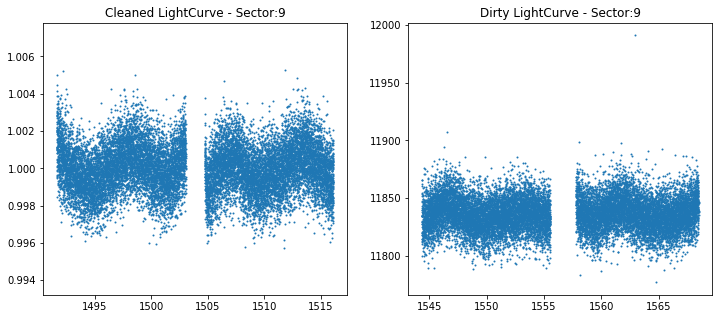

In [41]:
# STEP THREE
#normalizing data & verifying mask works

#################################################################################
#################################################################################

#normalizing
clean_flux = data['flux'] / np.mean(data['flux'])
clean_flux_err = data['flux_err'] / np.mean(data['flux_err'])
#except time, don't normalize that
clean_time = data['time']


#set up figure and axes for multiple plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
#first plot
ax1.scatter(clean_time, clean_flux,s=1)
ax1.set_title('Cleaned LightCurve - Sector:{}'.format(sector))
#second plot
ax2.scatter(sectors[sector].time,sectors[sector].flux,s=1)
ax2.set_title('Dirty LightCurve - Sector:{}'.format(sector));

In [42]:
# STEP FOUR
#saving sector clean data
sector = '9'

#################################################################################
#################################################################################


#naming path
pathname = 'cleaned_data/{}/'.format(star) #uses star id from the top of notebook
os.makedirs(os.path.dirname(pathname), exist_ok=True) #checks if folder exists and makes if it doesnt

#naming & saving clean data arrays
np.save(pathname + 'time_{}'.format(sector),clean_time) 
np.save(pathname + 'flux_{}'.format(sector),clean_flux)
np.save(pathname + 'fluxerr_{}'.format(sector),clean_flux_err)

# Clean - Sector 10 -- nothing to mask example

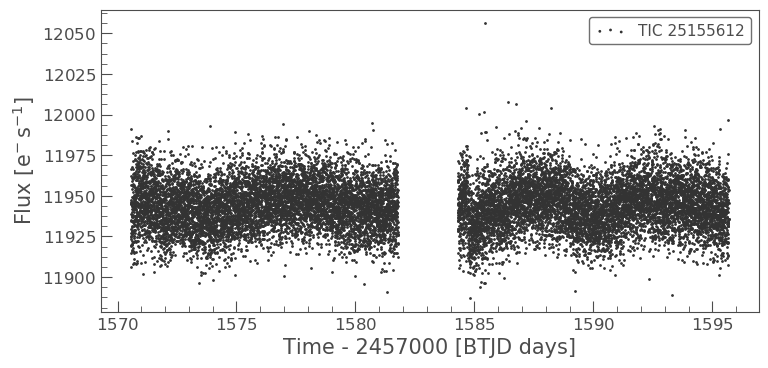

In [43]:
# STEP ONE
#useful when saving cleaned data later
sector = '10' 


#name these values
# beginmask1 = 1571.5
# endmask1 = 1572

# beginmask2 = 1578
# endmask2 = 1578.4

# beginmask3 = 1592.9
# endmask3 = 1593.5

# beginmask4 = 1594.2
# endmask4 = 1595.7

################################################################################
################################################################################

#finding bad bits to mask
sectors[sector].scatter()
# plt.ylim(43300, 44000)
# plt.axvline(beginmask1,color = 'r',linestyle = '--')
# plt.axvline(endmask1,color = 'b',linestyle='--')

# plt.axvline(beginmask2,color = 'r',linestyle = '--')
# plt.axvline(endmask2,color = 'b',linestyle='--')

# plt.axvline(beginmask3,color = 'r',linestyle = '--')
# plt.axvline(endmask3,color = 'b',linestyle='--')

# plt.axvline(beginmask4,color = 'r',linestyle = '--')
# plt.axvline(endmask4,color = 'b',linestyle='--')

# #removing outliers
# lc = sectors[sector].remove_outliers()

# #creates dictionary of the 3 separate data arrays needed PER sector
# data = {'flux': lc.flux,'flux_err': lc.flux_err, 'time':lc.time} 

In [44]:
# # STEP TWO
# # Masking Cell 
# #this cell is only needed if there are regions of bad bits to mask

# ################################################################################
# ################################################################################

# #create 1st mask based on time array
# mask = (data['time'] > beginmask) & (data['time'] < endmask) #uses values from above
# #applying 1st mask and save masked arrays in a dictionary
# data2 = {'time': data['time'][~mask], 'flux': data['flux'][~mask], \
#                'flux_err': data['flux_err'][~mask]}

# #create 2nd mask
# mask2 = (data2['time'] > beginmask2) & (data2['time'] < endmask2)
# #applying 2nd mask and save masked arrays in a dictionary
# data3 = {'time': data2['time'][~mask2], 'flux': data2['flux'][~mask2], \
#                'flux_err': data2['flux_err'][~mask2]}

# #create 3rd mask
# mask3 = (data3['time'] > beginmask3) & (data3['time'] < endmask3)
# #applying 3rd mask and save masked arrays in a dictionary
# data4 = {'time': data3['time'][~mask3], 'flux': data3['flux'][~mask3], \
#                'flux_err': data3['flux_err'][~mask3]}

# #create 4th mask
# mask4 = (data4['time'] > beginmask4) & (data4['time'] < endmask4)
# #applying 3rd mask and save masked arrays in a dictionary
# masked_data = {'time': data4['time'][~mask4], 'flux': data4['flux'][~mask4], \
#                'flux_err': data4['flux_err'][~mask4]}

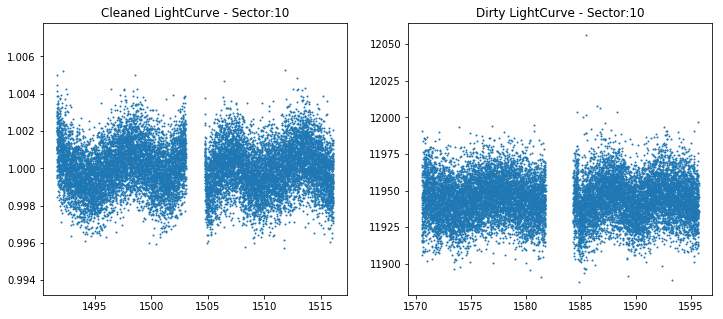

In [45]:
# STEP THREE
#normalizing data & verifying mask works

#################################################################################
#################################################################################

#normalizing
clean_flux = data['flux'] / np.mean(data['flux'])
clean_flux_err = data['flux_err'] / np.mean(data['flux_err'])
#except time, don't normalize that
clean_time = data['time']


#set up figure and axes for multiple plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
#first plot
ax1.scatter(clean_time, clean_flux,s=1)
ax1.set_title('Cleaned LightCurve - Sector:{}'.format(sector))
#second plot
ax2.scatter(sectors[sector].time,sectors[sector].flux,s=1)
ax2.set_title('Dirty LightCurve - Sector:{}'.format(sector));

In [46]:
# STEP FOUR
#saving sector clean data
sector = '10'

#################################################################################
#################################################################################


#naming path
pathname = 'cleaned_data/{}/'.format(star) #uses star id from the top of notebook
os.makedirs(os.path.dirname(pathname), exist_ok=True) #checks if folder exists and makes if it doesnt

#naming & saving clean data arrays
np.save(pathname + 'time_{}'.format(sector),clean_time) 
np.save(pathname + 'flux_{}'.format(sector),clean_flux)
np.save(pathname + 'fluxerr_{}'.format(sector),clean_flux_err)

# Clean - Sector 11

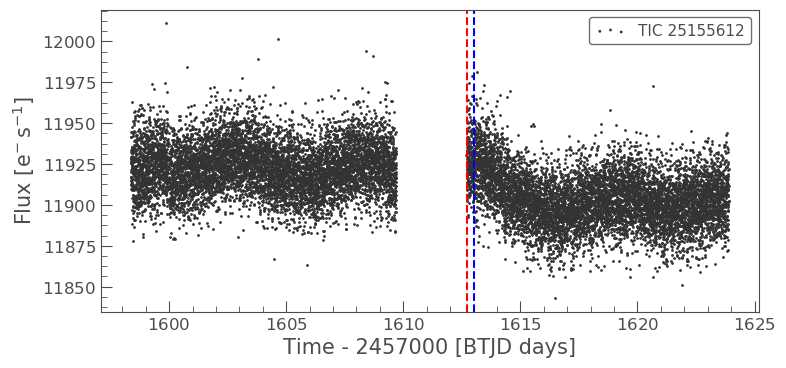

In [47]:
# STEP ONE
#useful when saving cleaned data later
sector = '11' 


#name these values
beginmask = 1612.7
endmask = 1613

################################################################################
################################################################################

#finding bad bits to mask
sectors[sector].scatter()
plt.axvline(beginmask,color = 'r',linestyle = '--')
plt.axvline(endmask,color = 'b',linestyle='--')

#removing outliers
lc = sectors[sector].remove_outliers()

#creates dictionary of the 3 separate data arrays needed PER sector
data = {'flux': lc.flux,'flux_err': lc.flux_err, 'time':lc.time} 

In [48]:
# STEP TWO
# Masking Cell  
#this cell is only needed if there are regions of bad bits to mask

################################################################################
################################################################################

#create mask based on time array
mask = (data['time'] > beginmask) & (data['time'] < endmask) #uses values from above

#applying mask.....saved masked arrays in a dictionary
masked_data = {'time': data['time'][~mask], 'flux': data['flux'][~mask], \
               'flux_err': data['flux_err'][~mask]}

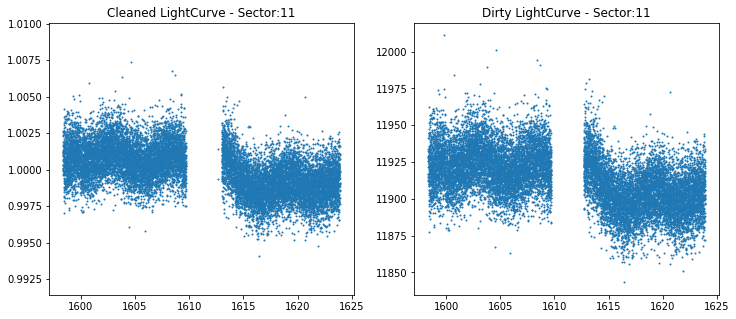

In [49]:
# STEP THREE
#normalizing data & verifying mask works

#################################################################################
#################################################################################

#normalizing
clean_flux = masked_data['flux'] / np.mean(masked_data['flux'])
clean_flux_err = masked_data['flux_err'] / np.mean(masked_data['flux_err'])
#except time, don't normalize that
clean_time = masked_data['time']


#set up figure and axes for multiple plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
#first plot
ax1.scatter(clean_time, clean_flux,s=1)
ax1.set_title('Cleaned LightCurve - Sector:{}'.format(sector))
#second plot
ax2.scatter(sectors[sector].time,sectors[sector].flux,s=1)
ax2.set_title('Dirty LightCurve - Sector:{}'.format(sector));

In [50]:
# STEP FOUR
#saving sector clean data
sector = '11'

#################################################################################
#################################################################################


#naming path
pathname = 'cleaned_data/{}/'.format(star) #uses star id from the top of notebook
os.makedirs(os.path.dirname(pathname), exist_ok=True) #checks if folder exists and makes if it doesnt

#naming & saving clean data arrays
np.save(pathname + 'time_{}'.format(sector),clean_time) 
np.save(pathname + 'flux_{}'.format(sector),clean_flux)
np.save(pathname + 'fluxerr_{}'.format(sector),clean_flux_err)

# Clean - Sector 12

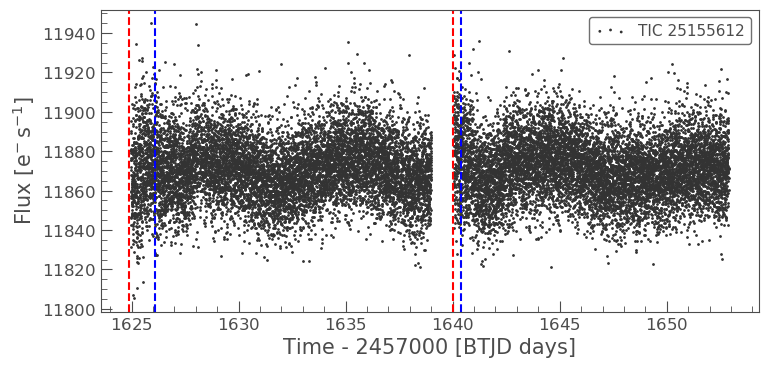

In [51]:
# STEP ONE
#useful when saving cleaned data later
sector = '12' 


#name these values
beginmask = 1624.9
endmask = 1626.1

beginmask2 = 1640
endmask2 = 1640.4

################################################################################
################################################################################

#finding bad bits to mask
sectors[sector].scatter()
plt.axvline(beginmask,color = 'r',linestyle = '--')
plt.axvline(endmask,color = 'b',linestyle='--')

plt.axvline(beginmask2,color = 'r',linestyle = '--')
plt.axvline(endmask2,color = 'b',linestyle='--')

#removing outliers
lc = sectors[sector].remove_outliers()

#creates dictionary of the 3 separate data arrays needed PER sector
data = {'flux': lc.flux,'flux_err': lc.flux_err, 'time':lc.time} 

In [52]:
# STEP TWO
# Masking Cell 
#this cell is only needed if there are regions of bad bits to mask

################################################################################
################################################################################

#create mask based on time array
mask = (data['time'] > beginmask) & (data['time'] < endmask) #uses values from above
#applying mask.....saved masked arrays in a dictionary
data2 = {'time': data['time'][~mask], 'flux': data['flux'][~mask], \
               'flux_err': data['flux_err'][~mask]}

#create mask based on time array
mask2 = (data2['time'] > beginmask2) & (data2['time'] < endmask2) #uses values from above
#applying mask.....saved masked arrays in a dictionary
masked_data = {'time': data2['time'][~mask2], 'flux': data2['flux'][~mask2], \
               'flux_err': data2['flux_err'][~mask2]}

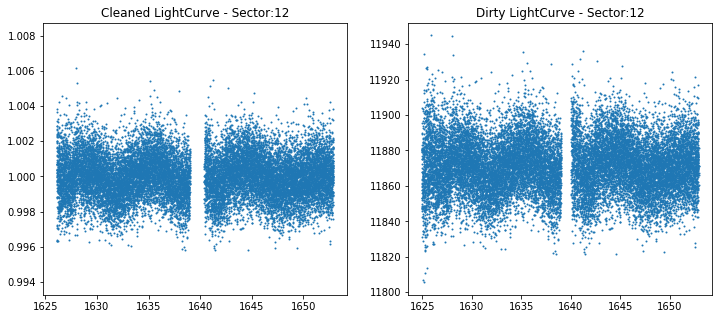

In [53]:
# STEP THREE
#normalizing data & verifying mask works

#################################################################################
#################################################################################

#normalizing
clean_flux = masked_data['flux'] / np.mean(masked_data['flux'])
clean_flux_err = masked_data['flux_err'] / np.mean(masked_data['flux_err'])
#except time, don't normalize that
clean_time = masked_data['time']


#set up figure and axes for multiple plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
#first plot
ax1.scatter(clean_time, clean_flux,s=1)
ax1.set_title('Cleaned LightCurve - Sector:{}'.format(sector))
#second plot
ax2.scatter(sectors[sector].time,sectors[sector].flux,s=1)
ax2.set_title('Dirty LightCurve - Sector:{}'.format(sector));

In [54]:
# STEP FOUR
#saving sector clean data
sector = '12'

#################################################################################
#################################################################################


#naming path
pathname = 'cleaned_data/{}/'.format(star) #uses star id from the top of notebook
os.makedirs(os.path.dirname(pathname), exist_ok=True) #checks if folder exists and makes if it doesnt

#naming & saving clean data arrays
np.save(pathname + 'time_{}'.format(sector),clean_time) 
np.save(pathname + 'flux_{}'.format(sector),clean_flux)
np.save(pathname + 'fluxerr_{}'.format(sector),clean_flux_err)

# Clean - Sector 13 -- nothing to mask example

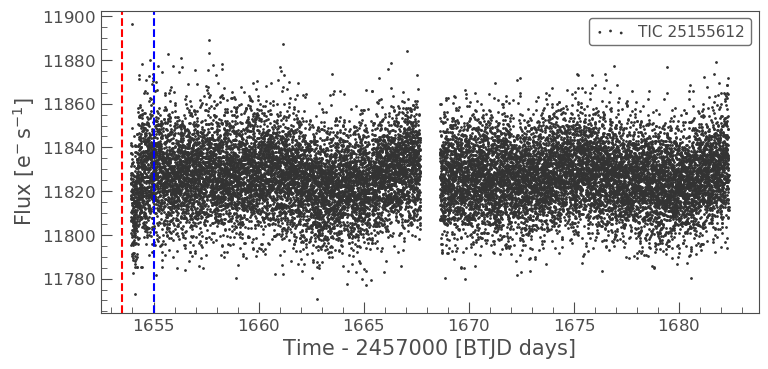

In [55]:
# STEP ONE
#useful when saving cleaned data later
sector = '13' 


#name these values
beginmask = 1653.5
endmask = 1655

################################################################################
################################################################################

#finding bad bits to mask
sectors[sector].scatter()
plt.axvline(beginmask,color = 'r',linestyle = '--')
plt.axvline(endmask,color = 'b',linestyle='--')

#removing outliers
lc = sectors[sector].remove_outliers()

#creates dictionary of the 3 separate data arrays needed PER sector
data = {'flux': lc.flux,'flux_err': lc.flux_err, 'time':lc.time} 

In [56]:
# STEP TWO
# Masking Cell 
#this cell is only needed if there are regions of bad bits to mask

################################################################################
################################################################################

#create mask based on time array
mask = (data['time'] > beginmask) & (data['time'] < endmask) #uses values from above
#applying mask.....saved masked arrays in a dictionary
masked_data = {'time': data['time'][~mask], 'flux': data['flux'][~mask], \
               'flux_err': data['flux_err'][~mask]}

# #create mask based on time array
# mask2 = (data2['time'] > beginmask2) & (data2['time'] < endmask2) #uses values from above
# #applying mask.....saved masked arrays in a dictionary
# masked_data = {'time': data2['time'][~mask2], 'flux': data2['flux'][~mask2], \
#                'flux_err': data2['flux_err'][~mask2]}

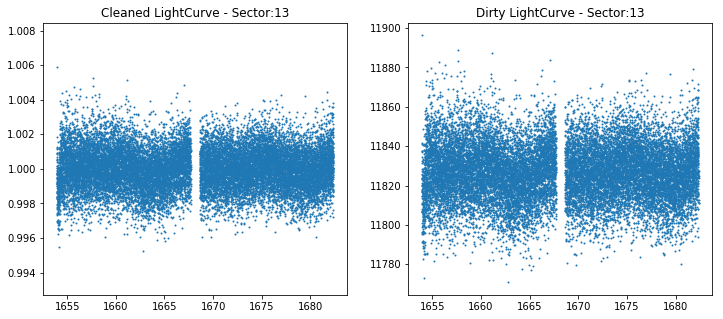

In [57]:
# STEP THREE
#normalizing data & verifying mask works

#################################################################################
#################################################################################

#normalizing
clean_flux = data['flux'] / np.mean(data['flux'])
clean_flux_err = data['flux_err'] / np.mean(data['flux_err'])
#except time, don't normalize that
clean_time = data['time']


#set up figure and axes for multiple plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
#first plot
ax1.scatter(clean_time, clean_flux,s=1)
ax1.set_title('Cleaned LightCurve - Sector:{}'.format(sector))
#second plot
ax2.scatter(sectors[sector].time,sectors[sector].flux,s=1)
ax2.set_title('Dirty LightCurve - Sector:{}'.format(sector));

In [58]:
# STEP FOUR
#saving sector clean data
sector = '13'

#################################################################################
#################################################################################


#naming path
pathname = 'cleaned_data/{}/'.format(star) #uses star id from the top of notebook
os.makedirs(os.path.dirname(pathname), exist_ok=True) #checks if folder exists and makes if it doesnt

#naming & saving clean data arrays
np.save(pathname + 'time_{}'.format(sector),clean_time) 
np.save(pathname + 'flux_{}'.format(sector),clean_flux)
np.save(pathname + 'fluxerr_{}'.format(sector),clean_flux_err)

# Stitch together all Sectors to get one long lightcurve

In [59]:
#open saved cleaned arrays by sector & save to one dataset per star


#################################################################################
#################################################################################

#to sort sector order so stitching is in correct time order
sector_list = np.sort(mytable['sector']) 

#opens all saved files
flux_list =[]
fluxerr_list = []
time_list = []
for i in sector_list: 
    print('verify you want Star with TIC:',star,'from sector:',i)
    #opens saved cleaned data
    time = np.load('cleaned_data/{}/time_{}.npy'.format(star,i))
    flux = np.load('cleaned_data/{}/flux_{}.npy'.format(star,i))
    fluxerr = np.load('cleaned_data/{}/fluxerr_{}.npy'.format(star,i))
    #collects/stitches cleaned data arrays from all sectors into a list
    time_list.append(time)
    flux_list.append(flux)
    fluxerr_list.append(fluxerr)
    
#to flatten those lists of arrays into one array (per data type-flux,time,fluxerr)
final_flux = np.concatenate(flux_list) 
final_fluxerr = np.concatenate(fluxerr_list)
final_time = np.concatenate(time_list)

verify you want Star with TIC: [25155612] from sector: 1
verify you want Star with TIC: [25155612] from sector: 2
verify you want Star with TIC: [25155612] from sector: 3
verify you want Star with TIC: [25155612] from sector: 4
verify you want Star with TIC: [25155612] from sector: 5
verify you want Star with TIC: [25155612] from sector: 6
verify you want Star with TIC: [25155612] from sector: 7
verify you want Star with TIC: [25155612] from sector: 9
verify you want Star with TIC: [25155612] from sector: 10
verify you want Star with TIC: [25155612] from sector: 11
verify you want Star with TIC: [25155612] from sector: 12
verify you want Star with TIC: [25155612] from sector: 13


In [60]:
# collects the last time value from each sector for plotting below

#################################################################################
#################################################################################

edges=[]
for i in time_list:
    maxes = np.max(i)
    edges.append(maxes)
edges

[1353.1773476451917,
 1353.1773476451917,
 1406.2144001774138,
 1436.1999993082388,
 1463.999494470963,
 1464.270322253991,
 1516.0849557224612,
 1516.0849557224612,
 1516.0849557224612,
 1623.8914851200225,
 1652.8919632652155,
 1682.3576018102672]

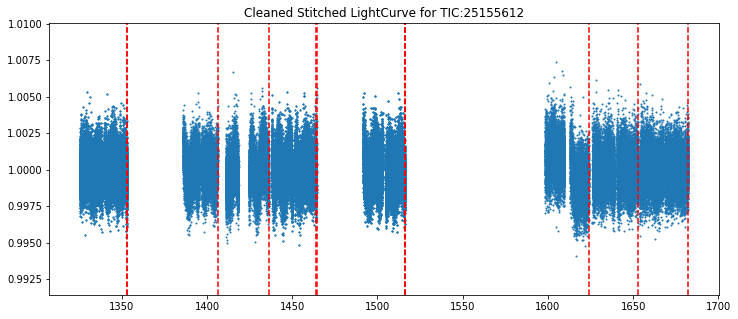

In [61]:
# plotting and verifying looks good

#################################################################################
#################################################################################

#plot cleaned stitched lightcurve
plt.figure(figsize = (12,5))
plt.scatter(final_time,final_flux,s=1)
plt.title('Cleaned Stitched LightCurve for TIC:{}'.format(mytable['star_id'][0]));

#plot ends of each sector to verify stitched all available! 
for i in edges:
    plt.axvline(i,linestyle='--',c='r')

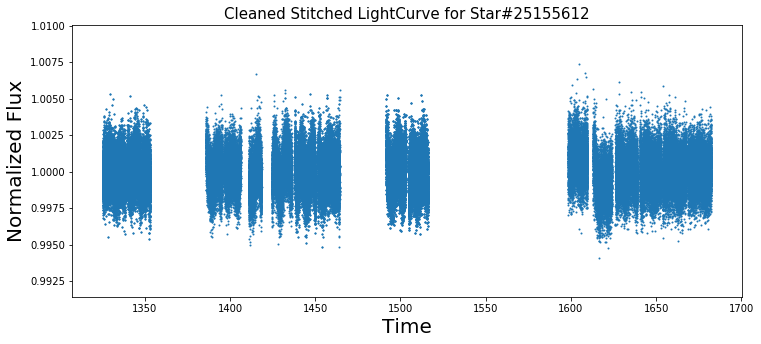

In [62]:
# final plot and saving arrays

#################################################################################
#################################################################################

#plot cleaned stitched lightcurve
plt.figure(figsize = (12,5))
plt.scatter(final_time,final_flux,s=1)
plt.ylabel('Normalized Flux',size=20)
plt.xlabel('Time',size=20)
plt.title('Cleaned Stitched LightCurve for Star#{}'.format(mytable['star_id'][0]),fontsize=15);
#plt.savefig('mid-year_pres-stitchedLC')



#saving cleaned-stitched data

#naming path
pathname = 'stitched_data/{}/'.format(star) #uses star id from the top of notebook
os.makedirs(os.path.dirname(pathname), exist_ok=True) #checks if folder exists and makes if it doesnt
#naming & saving clean data arrays
np.save(pathname + 'time',final_time) 
np.save(pathname + 'flux',final_flux)
np.save(pathname + 'fluxerr',final_fluxerr)